## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['1.csv', '1.py', '132r4otrnMaagdjsw7XkZe.pdf', '1673163036750-Photoroom.png', '1673163036750.jpeg', '2.csv', '27db7bf5-eafb-44c9-a231-44bc64cfa430.webp', '37790461790309.pdf', '3faa6649-c67e-4f6d-8e43-f6655e919204 (1).pdf', '3faa6649-c67e-4f6d-8e43-f6655e919204.pdf', '43MHNZnLkqvvXpHUxr8sxf.pdf', '44534949070079.pdf', '47621376954455.pdf', '4MDRSHwKVomio4xTrYSGaX.docx', '52175225484048.png', '61988283518123.png', '6TSTia9hNhrzp9seJpnVnz.pdf', '8Qs4h4sx2-jQwoJusik1f_6ba7fceff15c4f1cae21ed872e34a1b7.jpg', 'a-serene-ethereal-photo-of-a-temple-or-s_kzNreLEeQrq8vjgUnMa5Ag_wrousLrDS6qP2mAoeFDuag.jpeg', 'ac5gc4X6wD1VdxukzLyqn7.docx', 'activity_5[1].pdf', 'affiliate_marketing_workflow.json', 'AICTE_Report.pdf', 'AIEMOSENSE.FaceEmotionSense.csv', 'AIEMOSENSE.FaceEmotionSense1.csv', 'AIEMOSENSE.Face_Emotion_Sense.csv', 'AI_Cold_Call_Agent.json', 'AI_Healthcare_Tools (1).docx', 'AI_Healthcare_Tools.docx', 'aleksandr_nikitin_data_analyst_cv_eng.pdf', 'Amazon Prime Analysis.docx', 'AnnexureJ.pdf',

## II. Importing and understanding our dataset 

In [18]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [19]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [20]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [21]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0


#### Description

In [23]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [25]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [26]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [27]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [28]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

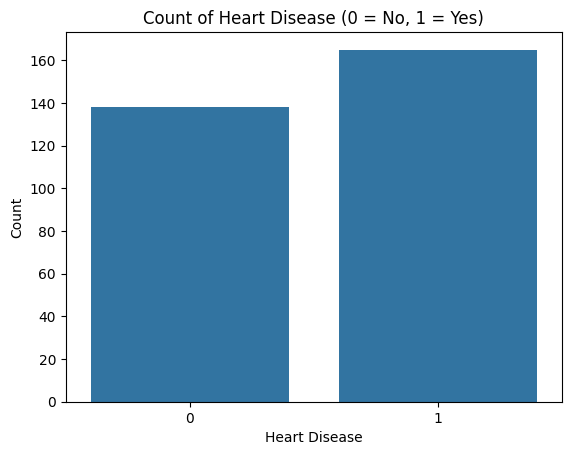

In [43]:
sns.countplot(x="target", data=dataset)
plt.title("Count of Heart Disease (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [30]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Analysing the 'Sex' feature

In [31]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

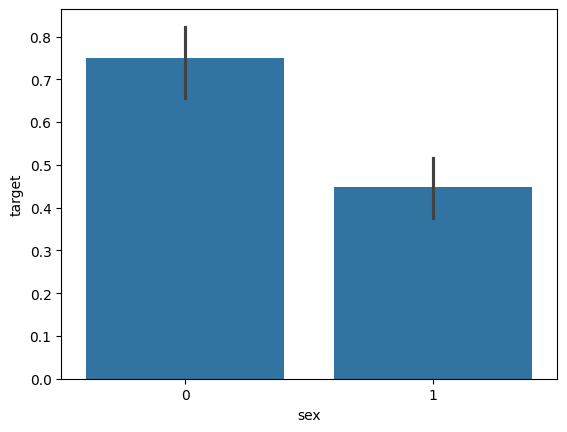

In [41]:
sns.barplot(x=dataset["sex"], y=y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [34]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

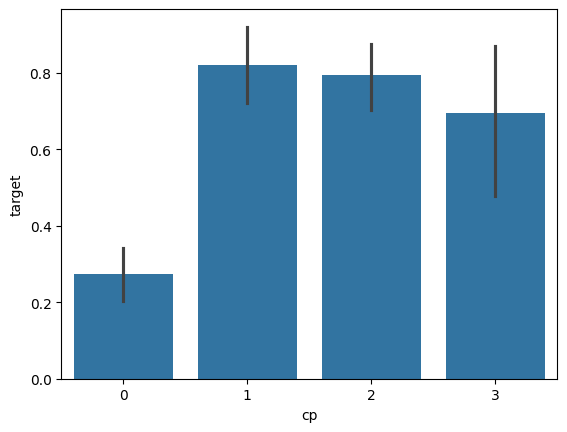

In [36]:
sns.barplot(x=dataset["cp"], y=y)


### Analysing the FBS feature

In [44]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [45]:
dataset["fbs"].unique()

array([1, 0])

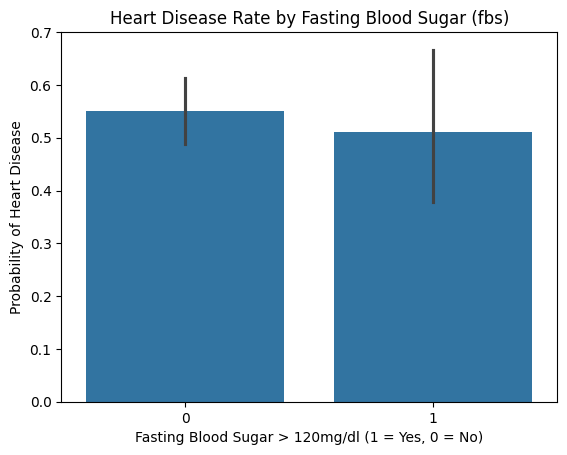

In [49]:
sns.barplot(x="fbs", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Fasting Blood Sugar (fbs)")
plt.xlabel("Fasting Blood Sugar > 120mg/dl (1 = Yes, 0 = No)")
plt.ylabel("Probability of Heart Disease")
plt.show()

### Analysing the restecg feature

In [50]:
dataset["restecg"].unique()

array([0, 1, 2])

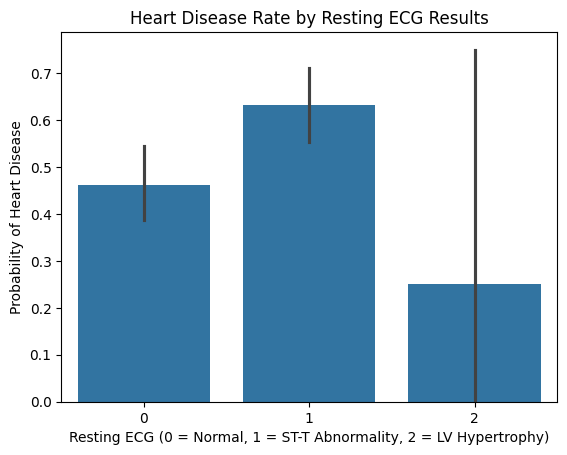

In [53]:
sns.barplot(x="restecg", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Resting ECG Results")
plt.xlabel("Resting ECG (0 = Normal, 1 = ST-T Abnormality, 2 = LV Hypertrophy)")
plt.ylabel("Probability of Heart Disease")
plt.show()

### Analysing the 'exang' feature

In [54]:
dataset["exang"].unique()

array([0, 1])

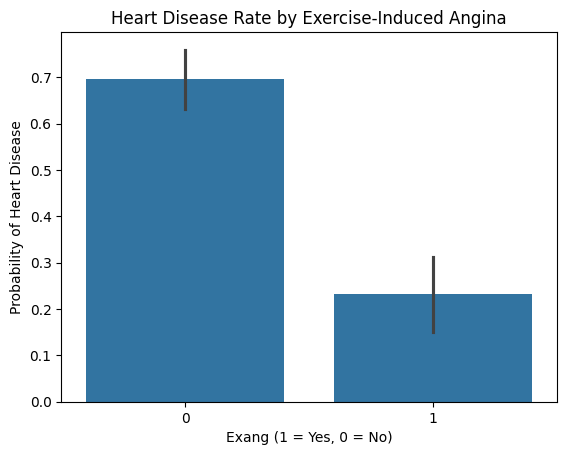

In [56]:
sns.barplot(x="exang", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Exercise-Induced Angina")
plt.xlabel("Exang (1 = Yes, 0 = No)")
plt.ylabel("Probability of Heart Disease")
plt.show()

### Analysing the Slope feature

In [57]:
dataset["slope"].unique()

array([0, 2, 1])

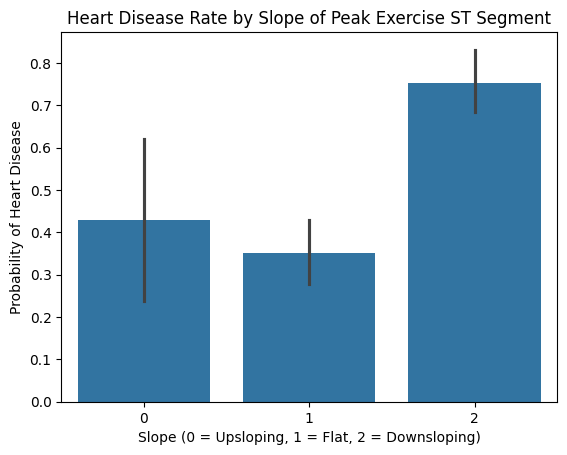

In [59]:
sns.barplot(x="slope", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Slope of Peak Exercise ST Segment")
plt.xlabel("Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)")
plt.ylabel("Probability of Heart Disease")
plt.show()

### Analysing the 'ca' feature

In [60]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

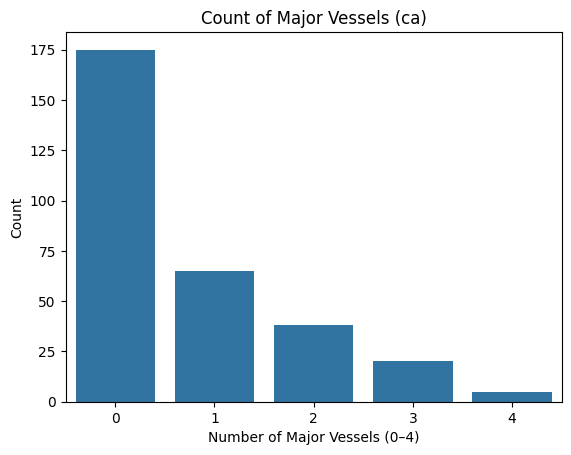

In [62]:
sns.countplot(x="ca", data=dataset)
plt.title("Count of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels (0–4)")
plt.ylabel("Count")
plt.show()

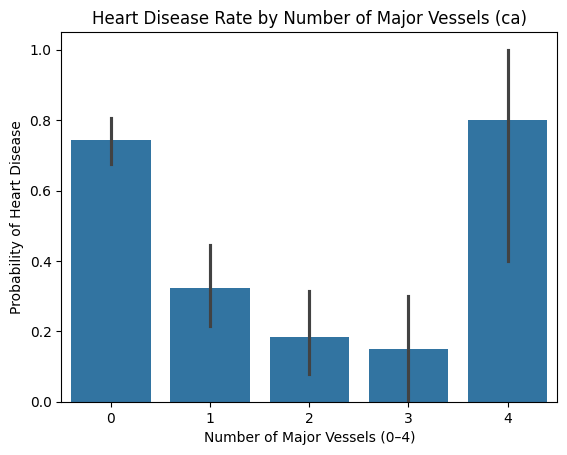

In [64]:
sns.barplot(x="ca", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Number of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels (0–4)")
plt.ylabel("Probability of Heart Disease")
plt.show()

In [65]:
dataset["thal"].unique()

array([1, 2, 3, 0])

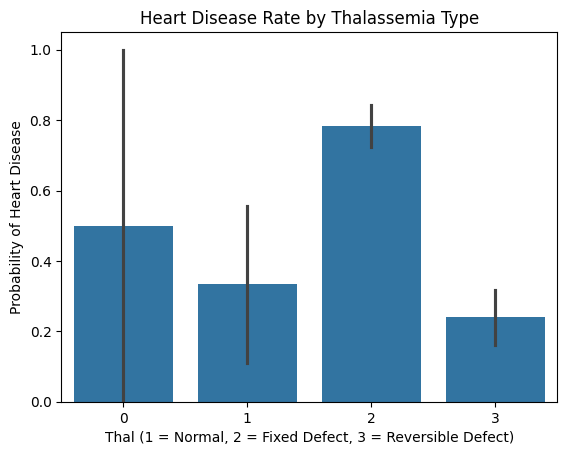

In [66]:
sns.barplot(x="thal", y="target", data=dataset, estimator=np.mean)
plt.title("Heart Disease Rate by Thalassemia Type")
plt.xlabel("Thal (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)")
plt.ylabel("Probability of Heart Disease")
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

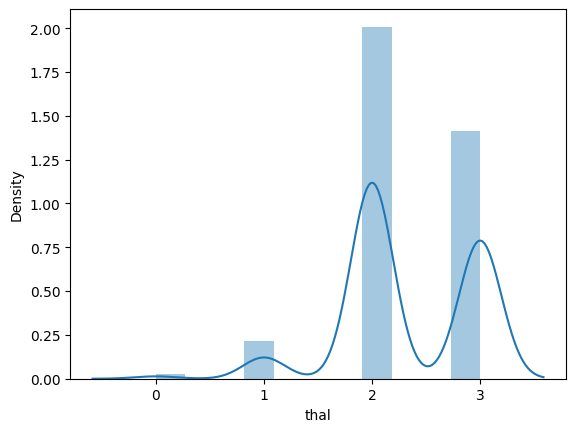

In [67]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [68]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [69]:
X_train.shape

(242, 13)

In [70]:
X_test.shape

(61, 13)

In [71]:
Y_train.shape

(242,)

In [72]:
Y_test.shape

(61,)

## V. Model Fitting

In [73]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [76]:
Y_pred_lr.shape

(61,)

In [77]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [79]:
Y_pred_nb.shape

(61,)

In [80]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [81]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [82]:
Y_pred_svm.shape

(61,)

In [83]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [85]:
Y_pred_knn.shape

(61,)

In [86]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [88]:
print(Y_pred_dt.shape)

(61,)


In [89]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [91]:
Y_pred_rf.shape

(61,)

In [92]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


## VI. Output final score

In [95]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

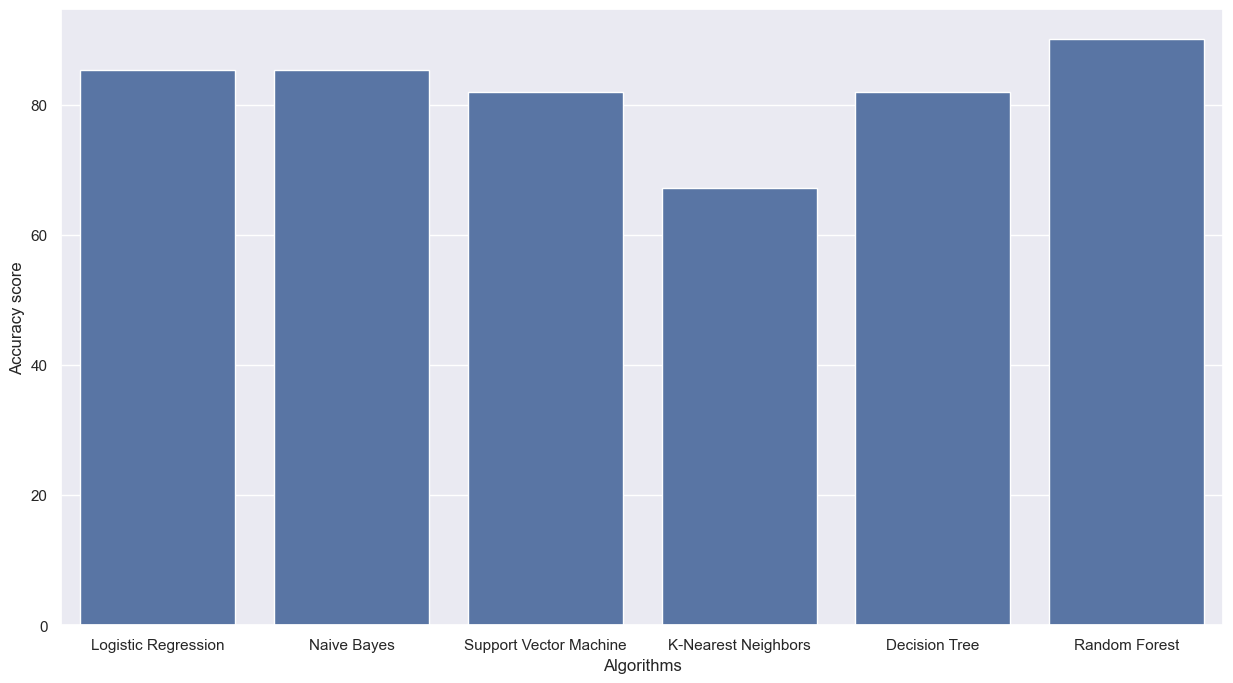

In [97]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

### random forest has good result as compare to other algorithms <br> <br>